In [1]:
import pandas

# Consignes projet


## Remarques générales


<span style="font-size:1.25em;background-color:grey;color:red;">
    COMMENTEZ VOTRE CODE (SVP - soyez cools)
</span>

<img src="images/meme.jpeg" width="60%" /> 

- Tenir le `requirements.txt` à jour si vous utilisez d'autres packages
- Vous avez le choix entre notebooks et fichiers .py
- Veillez à enregistrer tous les fichiers `pickle` dans un dossier `data`à la racine du repository

***
***
***


## Partie A : Nettoyage des données
***

On dispose d'un dataset de 13320 lignes contenant des informations concernant des biens immobiliers en vente (1 ligne = 1 bien). Les informations sont les suivantes : 

- `area_type` :  La façon de calculer la surface
- `availability` : La date de disponibilité
- `location` : le nom du quartier
- `size` : une information au sujet du nombre de chambres / pièces
- `society` : une variable catégorielle (qu'on pourra laisser de côté au cours du projet)
- `total_sqft` : la surface
- `bath` : le nombre de salles de bains
- `balcony` : le nombre de balcons
- `prix` : le prix


**1. Cleaning variable `availability`**

La variable `availability` contient des chaînes de caractères. 
Transformer ces valeurs en des valeurs de type `datetime` en faisant l'hypothèse que nous sommes le 01/01/2023 (ie pour les occurences 'Immediate Possession' et 'Ready To Move') et que l'année de toutes les dates est 2023. On remplacera les valeurs de la colonne `availability` par ces valeurs.


**2. Cleaning variable `size`**

**ATTENTION ! `df.size` correspond à un attribut de la DataFrame (la taille de la DataFrame) et donc il faudra donc toujours accéder à la variable `size` de ce dataset avec `df['size']`**

La variable `size` contient des chaînes de caractères. Regarder des valeurs et comprendre ce qu'elles veulent dire (on pourra en chercher quelques une sur internet), afin de transformer ces valeurs en des valeurs d'un type numérique (attention il y a des valeurs manquantes). On remplacera les valeurs de la colonne `size` par ces valeurs.

**3. Cleaning de la variable `total_sqft`**

La variable `total_sqft` est la surface du bien immobilier mais est encodé en tant que string. Convertir cette valeur en une valeur d'un type numérique. On  remplacera les valeurs de la colonne `total_sqft` par ces valeurs (il n'y a pas besoin de gérer tous les cas, on peut se contenter de 80 / 90 % des lignes qui auront une valeur non nulle renseignée et renvoyer `np.nan` pour les autre 10 / 20 % cas). 


**4. Vérification**


Après toutes ces étapes, la méthode `.info()` appliquée sur la DataFrame `df` doit afficher l'output suivant (où les XXXXX sont des valeurs qui dépendent de vos traitements): 

|   |              |                |                |
|--:|--------------|----------------|----------------|
| 0 | area_type    | 13320 non-null | object         | 
| 1 | availability | 13320 non-null | datetime64[ns] |
| 2 | location     | 13319 non-null | object         |
| 3 | size         | XXXXX non-null | float64        |
| 4 | society      | 7818 non-null  | object         |
| 5 | total_sqft   | XXXXX non-null | float64        |
| 6 | bath         | 13247 non-null | float64        |
| 7 | balcony      | 12711 non-null | float64        |
| 8 | price        | 13320 non-null | float64        |

**5. Sauvegarde**

Sauvegarder cette dataframe dans un fichier pickle nommée `data_cleaned.pk` (avec les nouvelles valeurs `availability`, `size` et `total_sqft`)

**6. Amélioration cleaning  `total_sqft`**

Veiller à ce que le cleaning de la variable `total_sqft` permette de renseigner plus de `99%` des valeurs.

Sauvegarder cette dataframe dans un fichier pickle nommé `data_cleaned_2.pk`


### Partie B : Statistiques descriptives
***

**Réutiliser les données de `data_cleaned` ou de `data_cleaned_2` pour cette partie**


**1.Scatter plots**

Pour chaque variable quantitative autre que le prix, la représenter dans un scatter plot en abscisse, avec en ordonnée le prix. 

**2.**

Représenter un graphique qui permet de déterminer pour quel nombre de balcons les biens ont le prix moyen le plus élevé.

**3.**

Faire de même avec les salles de bains à la place des balcons.
    
**4.**

Créer une DataFrame qui contient les colonnes suivantes : 
- `availability` : les dates de disponibilité possibles (valeurs uniques)
- `count` : le nombre de biens qui deviennent disponibles à cette date
- `count_cum`: le nombre de biens cumulés disponibles à cette date
- `price_mean`: le prix moyen des biens qui deviennent disponibles à cette date

Stocker cette DataFrame dans un fichier pickle nommé `data_availability.pk`.


**5.**

Représenter la matrice des corrélations des variables quantitatives
Vous pouvez vous inspirer de la réponse de Yunununun
sur ce thread : https://stackoverflow.com/questions/39409866/correlation-heatmap

Stocker les informations de la matrice des corrélations dans un fichier pickle nommé `correlation_matrix_values.pk` qui contient les colonnes suivant : `variable_1`,  `variable_2`, `coefficient_correlation`.

### Partie C : prédiction
***

**Le notebook `example.ipynb` contient du code qui est susceptible de vous aider.**

**Réutiliser les données de `data_cleaned` ou de `data_cleaned_2` pour cette partie**


#### **0. Données : découpage du dataset en train et test**

En fonction du nettoyage, il y a plus ou moins de valeurs nulles. 

**Retirer toutes les lignes qui ont au moins une valeur nulle dans une colonne numérique. Stocker ces données dans un fichier pickle nommé  `data_cleaned_3.pk`.**

En utilisant la méthode `train_test_split` de `sklearn.model_selection` sur les données sans les valeurs manquantes, créer une DataFrame `df_train` contenant 70 % des données et une DataFrame `df_test` contenant 30 % des données. Renseigner l'argument `random_state` et lui donner une valeur de 42.

**Stocker ces données dans deux fichiers pickle nommée `train.pk` et `test.pk`.**



#### **1. Prédiction avec une variable numérique**

**a. Un premier modèle**

On veut entraîner un modèle de régression linéaire de la forme $Y = a \times X$ où $Y$ est le prix et $X$ la surface. Cela reviendrait à dire que le prix est uniquement dépendant de la surface $X$ et du coefficient $a$ (qui serait le prix au mètre carré) ce qui est bien sûr une approximation (mais une approximation intéressante).

Entraîner un modèle de régression linéaire avec pour $X$ la variable `total_sqft` et pour $Y$  la variable `price` en utilisant `sklearn` sur la DataFrame `df_train` (l'argument `fit_intercept` peut valoir `True` ou `False` à votre convenance).

Calculer les prédictions `y_pred_test` sur la DataFrame de `test`. Stocker ces prédictions dans une table `model_1_predictions` qui contient les colonnes : 
- `index` (l'index de la DataFrame originelle)
- `total_sqft` (la valeur de `total_sqft`)
- `price` : la vraie valeur du prix 
- `price_pred` :  la valeur de la prédiction.

**b. Un second modèle**

Crée une variable qui est égale au nombre de jours à attendre avant que le bien soit disponible. On nomme cette variable `days_before`.
Faire de même qu'en a. avec la variable `days_before` pour $X$ (à la place de `total_sqft`).

#### **2. Prédiction avec plusieurs variables numériques**

On veut entraîner un modèle de régression linéaire de la forme $ Y = a_1 \times X_1 + a_2 \times X_2 + ....$ où $Y$ est le prix et $X_1$, $X_2$ ... sont des variables quantitatives parmi la surface, le nombre de pièces, le nombre de balcons, le nombre de salle de bains et le nombre de jours). 

Entraîner un modèle de régression linéaire avec toutes les variables numériques autres que le prix pour $X$ et pour $Y$  la variable `price` en utilisant `sklearn` sur la DataFrame `df_train` (l'argument `fit_intercept` peut valoir `True` ou `False` à votre convenance).

Calculer les prédictions `y_pred_test` sur la DataFrame de `test`. Stocker ces prédictions dans une table `model_2_predictions` qui contient les colonnes : 
- `index` (l'index de la DataFrame originelle)
- `total_sqft` (la valeur de `total_sqft`)
- `price` : la vraie valeur du prix 
- `price_pred` :  la valeur de la prédiction.


#### **3. Prédiction avec plusieurs variables numériques et une catégorie**

Inclure une variable catégorielle dans le modèle de régression linéaire en utilisant `pandas.get_dummies`. Vous pourrez vous inspirer de : https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html


#### **4. Prédiction avec un autre type de modèle**
Utiliser un autre modèle (par exemple un RandomForest ou un SVM ou autre) pour prédire le prix.
Comparer sur le test la qualité des prédictions des différents modèles : on pourra utiliser un $R^2$ ou toute autre métrique adéquate.


In [3]:
import pandas as pd

file_path = "data/dataset.csv"

# Charger les données
df = pd.read_csv(file_path)

# Nettoyage de la variable 'availability'
def clean_availability(date_str):
    if date_str == 'Immediate Possession' or date_str == 'Ready To Move':
        return pd.Timestamp('2023-01-01')
    else:
        # On suppose que toutes les dates sont en 2023
        date_components = date_str.split('-')
        if len(date_components) == 3:
            return pd.Timestamp(datetime(int('2023'), int(date_components[1]), int(date_components[0])))
        else:
            return pd.NaT  # Retourne 'Not a Time' si le format ne correspond pas

# Application de la fonction de nettoyage
df['availability'] = df['availability'].apply(clean_availability)

# Sauvegarde du dataframe nettoyé
output_path = "data/data_cleaned.pk"
df.to_pickle(output_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   area_type     13320 non-null  object        
 1   availability  10597 non-null  datetime64[ns]
 2   location      13319 non-null  object        
 3   size          13304 non-null  object        
 4   society       7818 non-null   object        
 5   total_sqft    13320 non-null  object        
 6   bath          13247 non-null  float64       
 7   balcony       12711 non-null  float64       
 8   price         13320 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 936.7+ KB


In [6]:
import numpy as np

# Fonction pour extraire le nombre de chambres à partir de la chaîne de caractères

def clean_size(size_str):
    if pd.isna(size_str):
        return np.nan
    num_bhk = size_str.split(' ')[0]  
    try:
        return float(num_bhk)
    except ValueError:  
        return np.nan

# Application de la fonction de nettoyage à la colonne 'size'
df['size'] = df['size'].apply(clean_size)

# Vérification du type de données
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   area_type     13320 non-null  object        
 1   availability  10597 non-null  datetime64[ns]
 2   location      13319 non-null  object        
 3   size          13304 non-null  float64       
 4   society       7818 non-null   object        
 5   total_sqft    13320 non-null  object        
 6   bath          13247 non-null  float64       
 7   balcony       12711 non-null  float64       
 8   price         13320 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 936.7+ KB


In [7]:
# Fonction pour convertir la surface en un nombre
def clean_total_sqft(sqft):
    if '-' in sqft:
        low, high = sqft.split('-')
        return (float(low) + float(high)) / 2
    try:
        return float(sqft)
    except ValueError:
        return np.nan

# Application de la fonction de nettoyage à la colonne 'total_sqft'
df['total_sqft'] = df['total_sqft'].apply(clean_total_sqft)

# Encore une fois, vérifiez les types de données
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   area_type     13320 non-null  object        
 1   availability  10597 non-null  datetime64[ns]
 2   location      13319 non-null  object        
 3   size          13304 non-null  float64       
 4   society       7818 non-null   object        
 5   total_sqft    13274 non-null  float64       
 6   bath          13247 non-null  float64       
 7   balcony       12711 non-null  float64       
 8   price         13320 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 936.7+ KB


In [ ]:
# Sauvegarde du DataFrame avec un nettoyage amélioré
output_path_improved = "data/data_cleaned_2.pk"
df.to_pickle(output_path_improved)

In [8]:
# Calculer le pourcentage de valeurs non nulles pour 'total_sqft'
non_null_percentage = df['total_sqft'].notnull().mean() * 100

# Afficher le pourcentage
print(f"Pourcentage de valeurs non nulles pour 'total_sqft': {non_null_percentage:.2f}%")

# Vérifier si le pourcentage est supérieur ou égal à 99%
if non_null_percentage >= 99:
    print("Plus de 99% des lignes ont une valeur non nulle pour 'total_sqft'.")
else:
    print("Moins de 99% des lignes ont une valeur non nulle pour 'total_sqft'. Des nettoyages supplémentaires peuvent être nécessaires.")


Pourcentage de valeurs non nulles pour 'total_sqft': 99.65%
Plus de 99% des lignes ont une valeur non nulle pour 'total_sqft'.


In [9]:
# Sauvegarde du DataFrame avec un nettoyage amélioré
output_path_improved = "data/data_cleaned_2.pk"
df.to_pickle(output_path_improved)

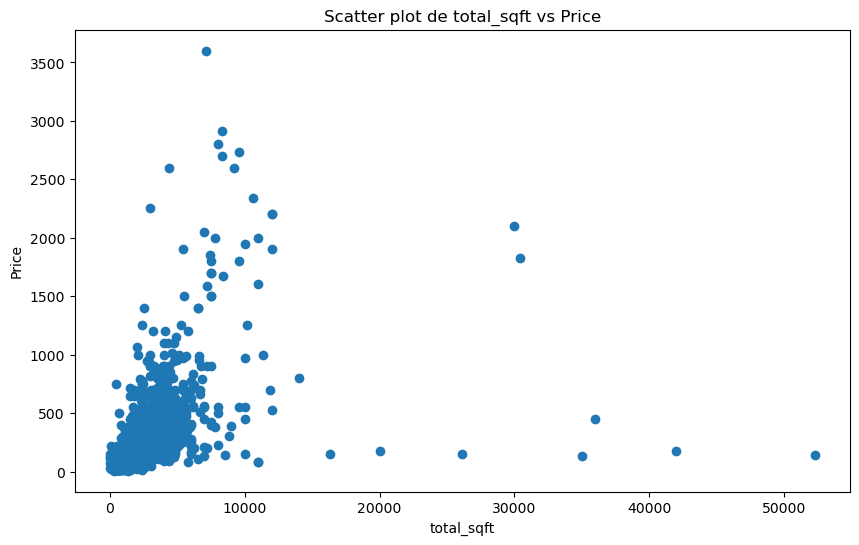

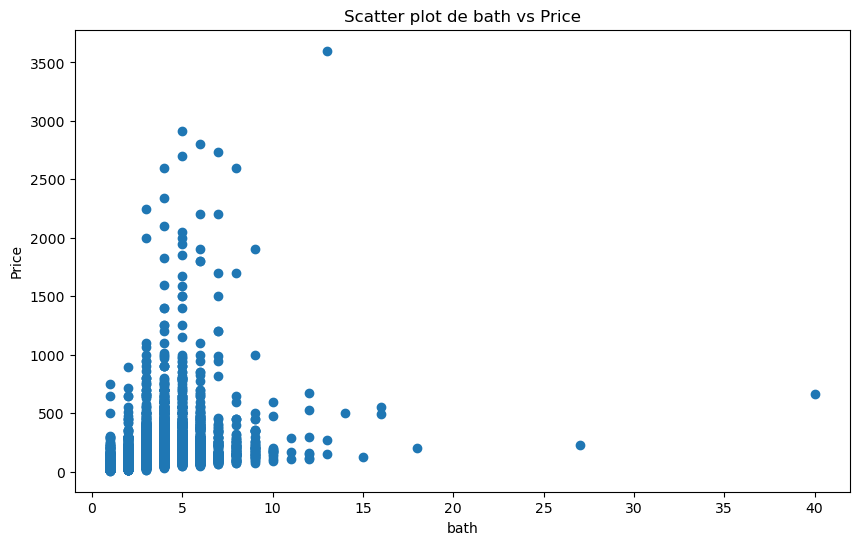

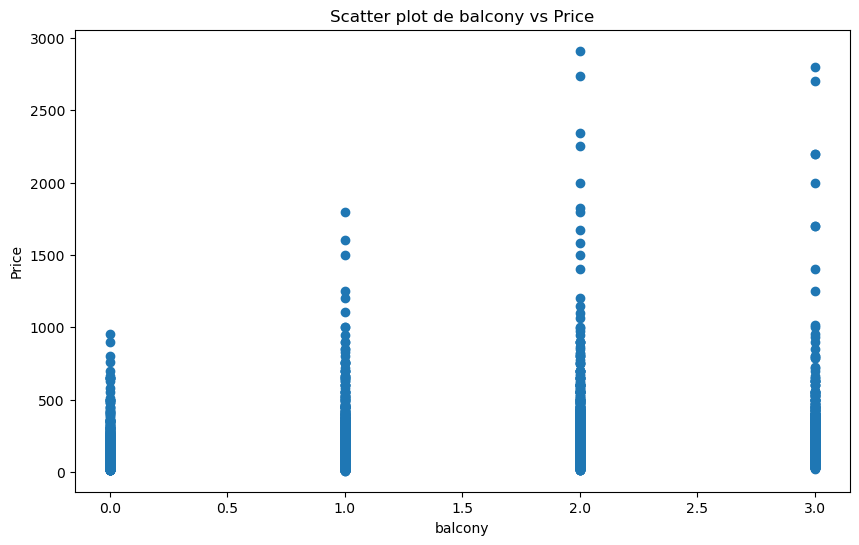

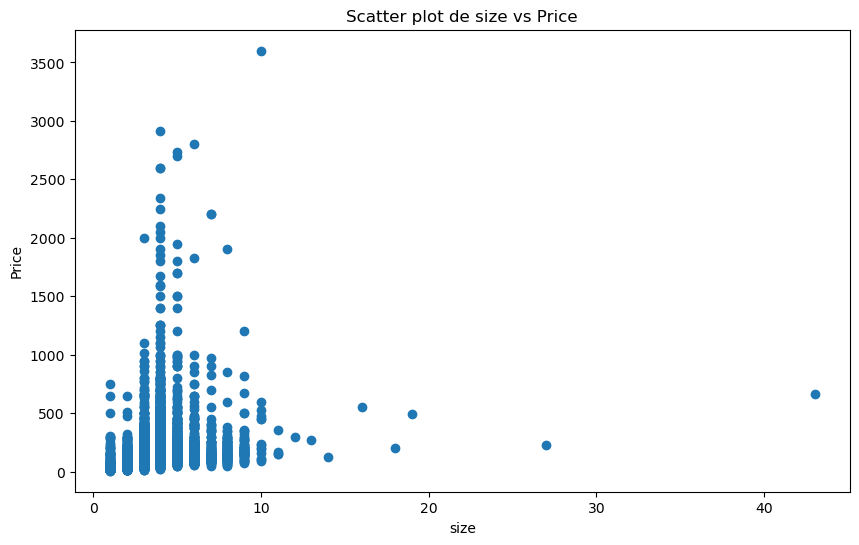

In [10]:
import matplotlib.pyplot as plt

# Charger les données nettoyées
df_cleaned = pd.read_pickle("data/data_cleaned_2.pk")

# Liste des variables quantitatives (à l'exception du 'price')
quantitative_vars = ['total_sqft', 'bath', 'balcony', 'size']

# Créer des scatter plots
for var in quantitative_vars:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_cleaned[var], df_cleaned['price'])
    plt.title(f'Scatter plot de {var} vs Price')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.show()


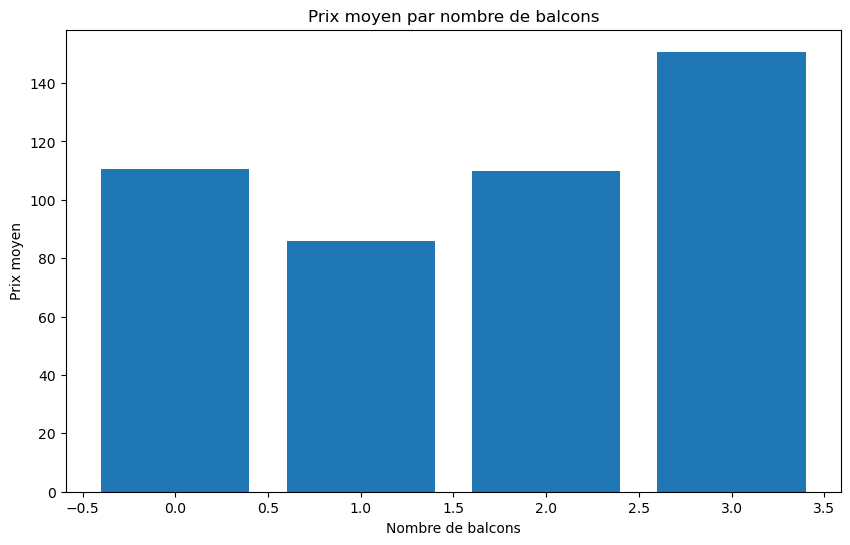

In [11]:
# Calcul du prix moyen par nombre de balcons
balcony_price_mean = df_cleaned.groupby('balcony')['price'].mean().reset_index()

# Graphique du prix moyen par nombre de balcons
plt.figure(figsize=(10, 6))
plt.bar(balcony_price_mean['balcony'], balcony_price_mean['price'])
plt.title('Prix moyen par nombre de balcons')
plt.xlabel('Nombre de balcons')
plt.ylabel('Prix moyen')
plt.show()


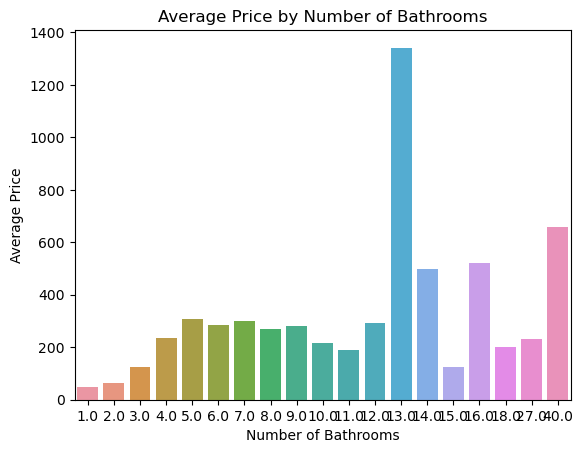

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer le prix moyen pour chaque nombre de salles de bains
bath_price_mean = df_cleaned.groupby('bath')['price'].mean().reset_index()

# Représenter le prix moyen par nombre de salles de bains
sns.barplot(data=bath_price_mean, x='bath', y='price')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.show()



In [15]:
# Créer la DataFrame pour 'availability'
availability_data = (
    df_cleaned.groupby('availability')
    .agg(count=('availability', 'size'), price_mean=('price', 'mean'))
    .sort_index()
)
availability_data['count_cum'] = availability_data['count'].cumsum()

# Stocker cette DataFrame dans un fichier pickle
availability_data.to_pickle("data/data_availability.pk")


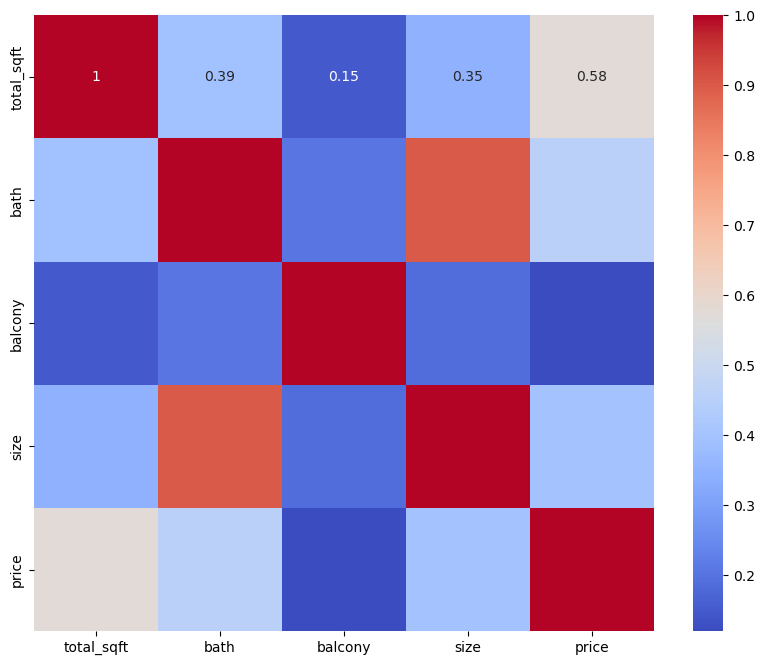

In [17]:

# Calcul de la matrice des corrélations
correlation_matrix = df_cleaned[quantitative_vars + ['price']].corr()

# Visualisation avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Préparer les données pour le stockage
correlations = correlation_matrix.unstack().reset_index()
correlations.columns = ['variable_1', 'variable_2', 'coefficient_correlation']

# Filtrer pour éliminer les doublons
correlations = correlations[correlations['variable_1'] < correlations['variable_2']]


# Stocker les informations de la matrice des corrélations dans un DataFrame
correlation_matrix_melted = correlation_matrix.reset_index().melt('index')
correlation_matrix_melted.columns = ['variable_1', 'variable_2', 'coefficient_correlation']

# Stocker dans un fichier pickle
correlation_matrix_melted.to_pickle("data/correlation_matrix_values.pk")


In [18]:
from sklearn.model_selection import train_test_split

# Charger le dataframe nettoyé 
df_cleaned = pd.read_pickle("data/data_cleaned_3.pk")

# Retirer toutes les lignes qui ont au moins une valeur nulle dans une colonne numérique
df_cleaned_dropna = df_cleaned.dropna(subset=['total_sqft', 'size', 'bath', 'balcony', 'price'])

# Enregistrer le dataframe nettoyé de toutes valeurs nulles
df_cleaned_dropna.to_pickle("data/data_cleaned_3.pk")

# Découpage du dataset en train et test
df_train, df_test = train_test_split(df_cleaned_dropna, test_size=0.3, random_state=42)

# Enregistrer les datasets train et test
df_train.to_pickle("data/train.pk")
df_test.to_pickle("data/test.pk")


In [22]:
from sklearn.linear_model import LinearRegression

# Modèle de régression linéaire pour `total_sqft`
X_train = df_train[['total_sqft']]
y_train = df_train['price']
model_1 = LinearRegression(fit_intercept=True)
model_1.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
X_test = df_test[['total_sqft']]
y_test = df_test['price']
y_pred_test_1 = model_1.predict(X_test)

# Création de la table de prédictions pour le modèle 1
model_1_predictions = df_test.copy()
model_1_predictions['price_pred'] = y_pred_test_1

# Stockage de la table de prédictions
model_1_predictions.to_pickle("data/model_1_predictions.pk")


In [48]:
# Charger les données nettoyées
df = pd.read_pickle("data/data_cleaned_3.pk")

# Ajout de la colonne `days_before`
df['days_before'] = (df['availability'] - pd.Timestamp('2023-01-01')).dt.days

# Remplacement des valeurs NaN dans 'days_before' par la médiane
days_before_median = df['days_before'].median()
df['days_before'].fillna(days_before_median, inplace=True)

# Suppression de toutes les lignes contenant des NaN dans les colonnes utilisées
df.dropna(subset=['days_before', 'price'], inplace=True)

# Séparation des données en ensembles d'entraînement et de test
X = df[['days_before']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle de régression linéaire
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Création de la DataFrame pour stocker les prédictions
predictions_df = X_test.copy()
predictions_df['price'] = y_test
predictions_df['price_pred'] = y_pred

# Enregistrement des prédictions dans un fichier pickle
predictions_df.to_pickle("data/model_2_predictions_days_before.pk")


In [49]:
# Vérifier le nombre de NaN dans chaque colonne de feature
print(X_train_multi.isnull().sum())


total_sqft        0
size              0
bath              0
balcony           0
days_before    1817
dtype: int64


In [50]:
# Suppression des lignes avec NaN dans 'days_before' 
from sklearn.impute import SimpleImputer


df_cleaned = df.dropna(subset=['days_before'])

# Ou imputation des NaN dans 'days_before'
imputer = SimpleImputer(strategy='median')
df['days_before'] = imputer.fit_transform(df[['days_before']]).ravel()

# Vérifiez encore une fois les valeurs NaN
print(df['days_before'].isnull().sum())


0


In [56]:
# Charger les données nettoyées
df = pd.read_pickle("data/data_cleaned_3.pk")

# S'assurer que 'days_before' est correctement calculé et nettoyé
def calculate_days_before(row):
    try:
        return (row['availability'] - pd.Timestamp('2023-01-01')).days
    except Exception as e:
        return np.nan

df['days_before'] = df.apply(calculate_days_before, axis=1)

# Imputation des valeurs manquantes pour 'days_before'
imputer = SimpleImputer(strategy='median')
df['days_before'] = imputer.fit_transform(df[['days_before']]).ravel()

# Confirmer qu'il n'y a plus de NaN dans les colonnes utilisées
features = ['total_sqft', 'size', 'bath', 'balcony', 'days_before']
print(df[features].isnull().sum())

# Séparation des données en ensembles d'entraînement et de test
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle de régression linéaire pour plusieurs variables
model_multi = LinearRegression(fit_intercept=True)
model_multi.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_test_multi = model_multi.predict(X_test)

# Création de la DataFrame pour stocker les prédictions
predictions_df = X_test.copy()
predictions_df['price'] = y_test
predictions_df['price_pred'] = y_pred_test_multi

# Enregistrement des prédictions dans un fichier pickle
predictions_df.to_pickle("data/model_multi_predictions.pkl")

print("Modèle entraîné et prédictions enregistrées.")


total_sqft     0
size           0
bath           0
balcony        0
days_before    0
dtype: int64
Modèle entraîné et prédictions enregistrées.


In [57]:
# Transformer la variable catégorielle en dummies
area_type_dummies = pd.get_dummies(df_cleaned['area_type'], drop_first=True)

# Concaténer les dummies au dataframe principal
df_with_dummies = pd.concat([df_cleaned, area_type_dummies], axis=1)

# Refaire le découpage train/test après avoir ajouté les dummies
df_train_with_dummies, df_test_with_dummies = train_test_split(df_with_dummies, test_size=0.3, random_state=42)


# Modèle de régression linéaire avec variables dummies
features_with_dummies = features + list(area_type_dummies.columns)
X_train_with_dummies = df_train_with_dummies[features_with_dummies]
# Imputation des valeurs manquantes pour 'days_before'
imputer = SimpleImputer(strategy='median')
df['days_before'] = imputer.fit_transform(df[['days_before']]).ravel()

y_train_with_dummies = df_train_with_dummies['price']
model_with_dummies = LinearRegression(fit_intercept=True)
model_with_dummies.fit(X_train_with_dummies, y_train_with_dummies)

# Prédictions sur l'ensemble de test
X_test_with_dummies = df_test_with_dummies[features_with_dummies]
y_pred_test_with_dummies = model_with_dummies.predict(X_test_with_dummies)


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Modèle RandomForest pour prédire le prix
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_with_dummies, y_train_with_dummies)

# Prédictions sur l'ensemble de test
y_pred_test_rf = random_forest_model.predict(X_test_with_dummies)

# Calculer R^2 pour la régression linéaire
r2_linear = r2_score(df_test_with_dummies['price'], y_pred_test_with_dummies)

# Calculer R^2 pour RandomForest
r2_rf = r2_score(df_test_with_dummies['price'], y_pred_test_rf)

print(f"R^2 score for Linear Regression: {r2_linear}")
print(f"R^2 score for RandomForest Regression: {r2_rf}")


R^2 score for Linear Regression: 0.44698446114943624
R^2 score for RandomForest Regression: 0.6172735657438926
